# Exploratory Data Analysis (EDA) Overview

- **Overview of the Data**  
  - Understand the dataset structure: number of rows, columns, and data types.

- **Summary Statistics**  
  - Review central tendency, dispersion, and distribution shape.

- **Distribution of Numerical Features**  
  - Visualize numerical feature distributions to identify patterns, skewness, and outliers.

- **Distribution of Categorical Features**  
  - Analyze categorical features for frequency and variability.

- **Correlation Analysis**  
  - Explore relationships between numerical features.

- **Identifying Missing Values**  
  - Identify and assess missing values for appropriate imputation.

- **Outlier Detection**  
  - Use box plots to detect outliers.


## Overview of the Data

In [20]:
import sys
import os
import pandas as pd
sys.path.append('../scripts')
from data_preprocessor import DataLoader,DataCleaner
from EDA import *

In [21]:
# Load dataset
file_path = '../data/processed/cleaned_df.parquet' 
processed_data = DataLoader.load_data(file_path)

# Check the first few rows of the dataset
processed_data.head(10)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15T02:18:49Z,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15T02:19:08Z,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,None,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15T02:44:21Z,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15T03:32:55Z,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15T03:34:21Z,2.0,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256.0,ProviderId_6,ProductId_3,airtime,ChannelId_3,3679.0,NaN,2018-11-15T03:35:10Z,2.0,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256.0,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000.0,2018-11-15T03:44:31Z,2.0,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256.0,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,NaN,2018-11-15T03:45:13Z,2.0,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,3679.0,500.0,2018-11-15T04:14:59Z,2.0,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256.0,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600.0,2018-11-15T04:31:48Z,2.0,0


In [22]:
# Convert 'TransactionStartTime' to datetime
processed_data['TransactionStartTime'] = pd.to_datetime(processed_data['TransactionStartTime'], errors='coerce')

In [23]:
processed_data.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256.0,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000.0,2018-11-15 02:18:49+00:00,2.0,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,3679.0,20.0,2018-11-15 02:19:08+00:00,2.0,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256.0,None,ProductId_1,airtime,ChannelId_3,500.0,500.0,2018-11-15 02:44:21+00:00,2.0,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256.0,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,NaN,2018-11-15 03:32:55+00:00,2.0,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,NaN,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644.0,2018-11-15 03:34:21+00:00,2.0,0


In [24]:
# Data Overview
eda = CreditRiskEDA(processed_data)
eda.data_overview()

Data Overview:
Number of rows: 95662
Number of columns: 16

Column Data Types:
TransactionId                        object
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
CurrencyCode                         object
CountryCode                         float64
ProviderId                           object
ProductId                            object
ProductCategory                      object
ChannelId                            object
Amount                              float64
Value                               float64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                     float64
FraudResult                           int64
dtype: object

First Five Rows:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   Ba

## Summary Statistics

In [25]:
# Summary Statistics
summary_stats = eda.summary_statistics()
summary_stats

,count,mean,std,min,25%,50%,75%,max,median,mode,skewness,kurtosis
CountryCode,95660.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0,256.0,256.0,0.000000,0.000000
Amount,95662.0,6718.071528,123306.788665,-1000000.0,-50.0,1000.0,2800.0,9880000.0,1000.0,1000.0,51.098495,3363.128294
Value,95659.0,9900.640410,123124.006009,2.0,275.0,1000.0,5000.0,9880000.0,1000.0,1000.0,51.290296,3377.964517
PricingStrategy,95659.0,2.255899,0.732849,0.0,2.0,2.0,2.0,4.0,2.0,2.0,1.659363,2.089115
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22.196295,490.685762


## Handling Missing Values

In [30]:
# Filling categorical columns with mode
categorical_columns = ['AccountId', 'CountryCode', 'ProviderId', 'PricingStrategy']
for col in categorical_columns:
    processed_data[col] = processed_data[col].fillna(processed_data[col].mode()[0])

In [31]:
# Filling numerical columns with median
numerical_columns = ['Value', 'TransactionStartTime']
for col in numerical_columns:
    processed_data[col] = processed_data[col].fillna(processed_data[col].median())

In [33]:
# Handling Missing Values
missing_values = processed_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

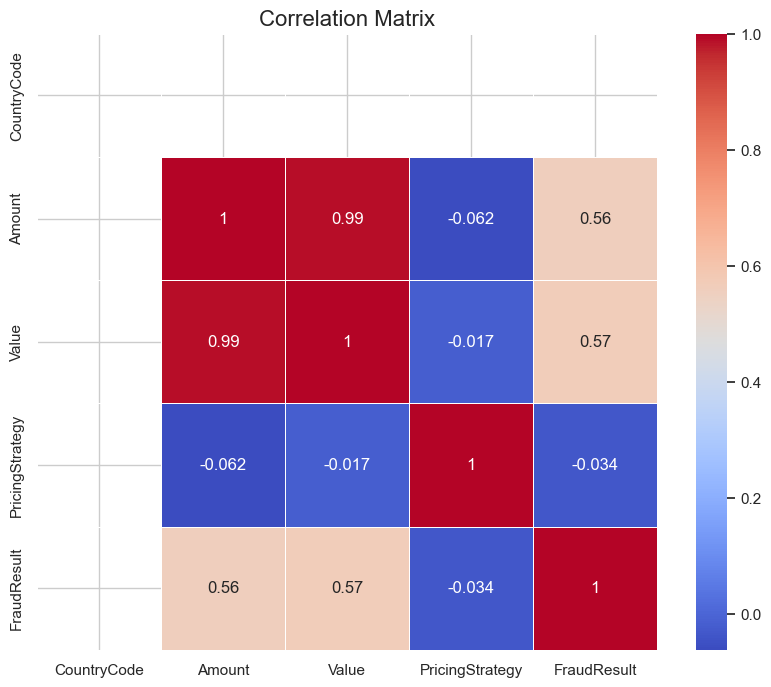

In [38]:
from credit_risk_EDA import CreditRiskEDA
eda = CreditRiskEDA(processed_data)

eda.correlation_analysis()

In [39]:
processed_data = DataCleaner(processed_data)
categorical_vars, numerical_vars = processed_data.identify_variable_types()

## Distribution of Numerical Features

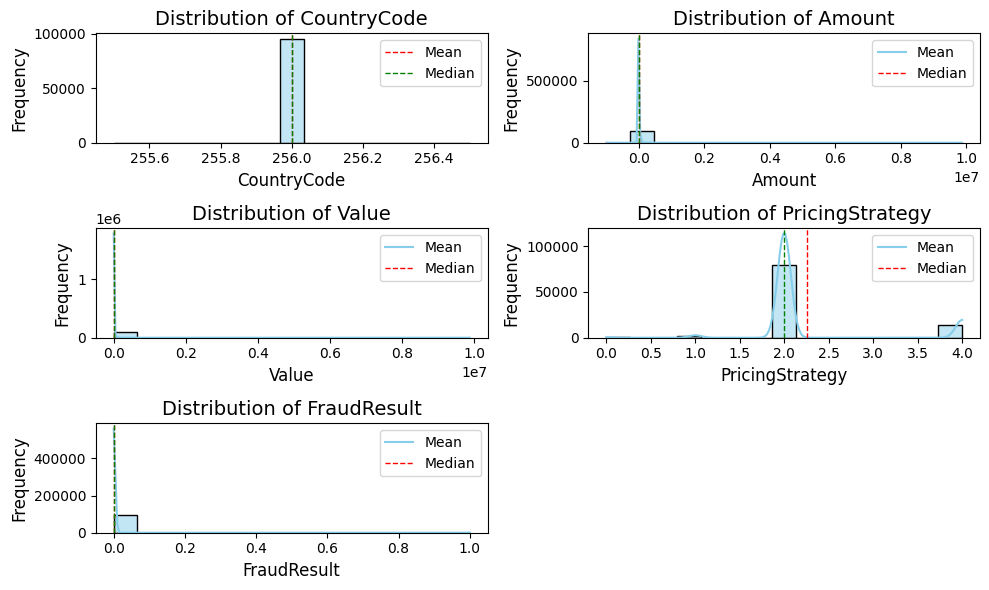

In [52]:
# Distribution of Numerical Features
eda.plot_numerical_distribution(numerical_vars)

### Observations

- **CountryCode** is approximately symmetric with skewness **0.0**.
- **Amount** is right-skewed with skewness **51.098489522819115**. This indicates a longer tail on the right side.
- **Value** is right-skewed with skewness **51.29108598736249**. This indicates a longer tail on the right side.
- **PricingStrategy** is right-skewed with skewness **1.6590573072757961**. This indicates a longer tail on the right side.
- **FraudResult** is right-skewed with skewness **22.196294806589147**. This indicates a longer tail on the right side.


## Distribution of Categorical Features

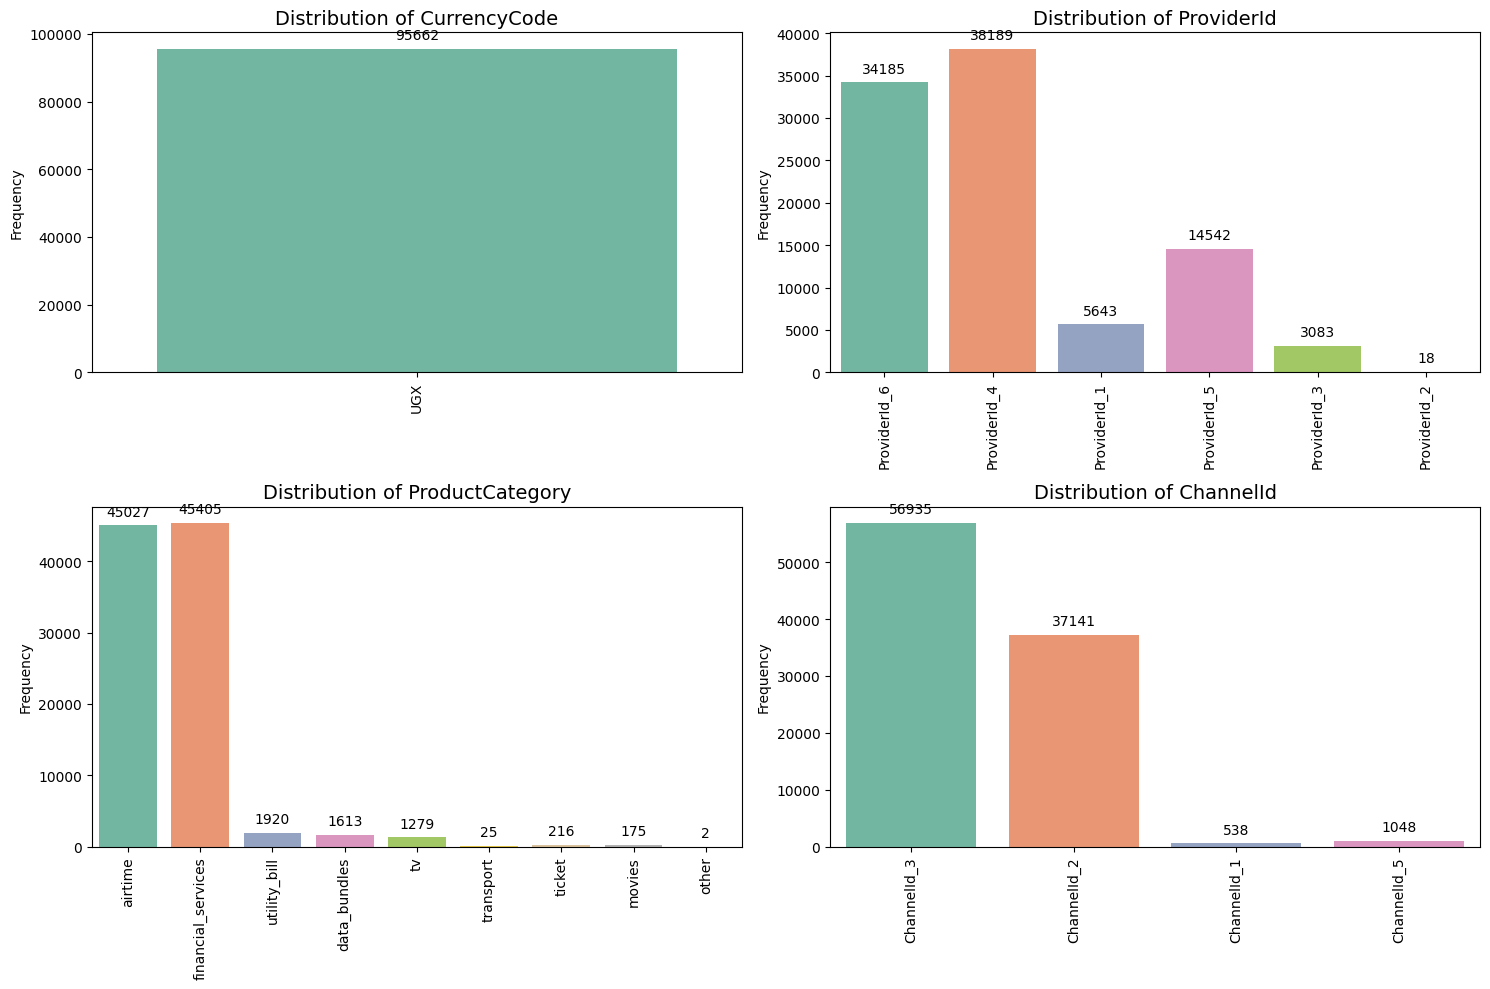

In [53]:
# Distribution of Categorical Features
eda.plot_categorical_distribution()

## Skewness of Numerical Features

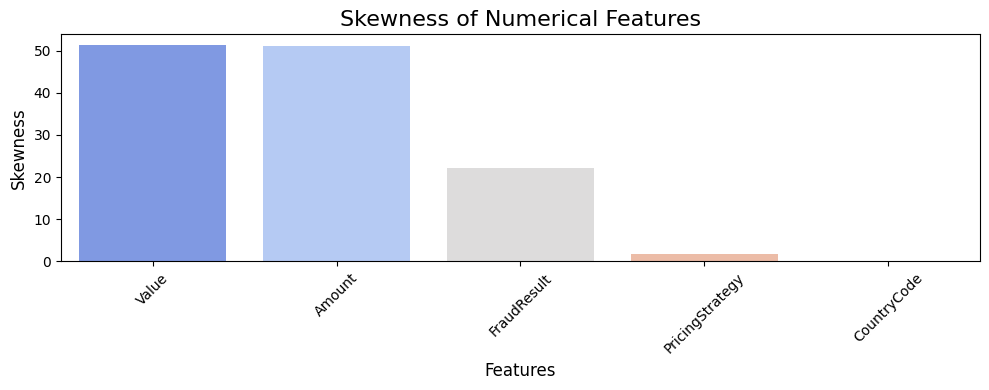

In [54]:
# Skewness of Numerical Features
eda.plot_skewness()

## Outlier Detection

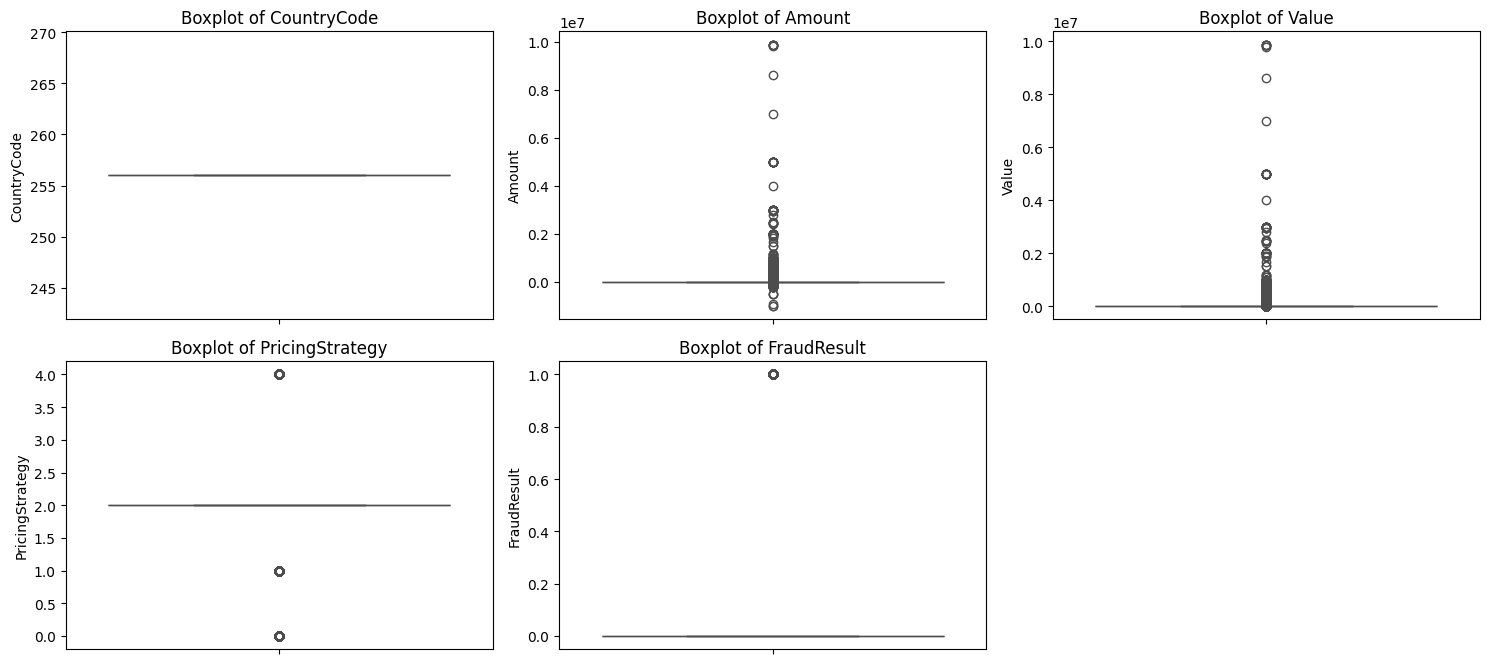

In [55]:
# Outliers Detection
eda.detect_outliers(numerical_vars)